In [1]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML

# Enable interactive figures.
%matplotlib notebook

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
seed = 1234
np.random.seed(seed)

### Definição de funções úteis.

In [3]:
def calculateErrorSurface(X, y):
    """Generate data points for plotting the error surface."""
    # Number of examples.
    N = len(y)
    # Generate values for parameter space.
    M = 200
    a0 = np.linspace(-10.0, 14.0, M)
    a1 = np.linspace(-10.0, 14.0, M)

    A0, A1 = np.meshgrid(a0, a1)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A0[iter1, iter2] + A1[iter1, iter2]*X
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))
            
    return J, A0, A1
            
def calculateClosedFormSolution(X, y):
    """Calculate closed-form solution using the normal equation."""
    # Number of examples.
    N = len(y)
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/N)*np.sum(np.power((y - yhat), 2))
    
    return Joptimum, a_opt

def h(X, a):
    """Hypothesis Function: matrix form."""    
    return X.dot(a)

def batchGradientDescent(X, y, alpha, n_iterations):
    """Batch gradient descent solution."""
    
    # Number of examples.
    N = len(y)
    
    # Initialize error history with zeros.
    Jgd = np.zeros(n_iterations+1)
    
    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)
    
    # Prediction with initial 'a'.
    yhat = X.dot(a)
    # Calculate the error for initial 'a' value.
    Jgd[0] = (1.0/N)*np.sum(np.power(y - yhat, 2))

    # Batch gradient-descent loop.
    error = 1
    iteration = 0
    while(error > 1e-7 and iteration < n_iterations):
        
        # Calculate the gradient vector.
        h = X.dot(a)
        gradients = -(2.0/N)*X.T.dot(y - h)
        
        # Update the weights.
        a = a - alpha * gradients
        
        # Keep current value in the history vector.
        a_hist[:, iteration+1] = a.reshape(2,)
        
        # Calculate and keep the error for the updated 'a' value.
        yhat = X.dot(a)
        Jgd[iteration+1] = (1.0/N)*sum(np.power((y - yhat), 2))
        
        # Calculate the error between two subsequent iterations.
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
        
        # Increment the iteration number.
        iteration += 1
        
    return a, a_hist, Jgd, iteration

### Geração do conjunto de dados.

A função objetivo é dada por
$$y = 2 + 2x,$$
onde $a_0 = a_1 = 2$.

In [4]:
# Number of examples.
N = 1000

# Feature.
x = 2 * np.random.rand(N, 1) - 1

# Noise.
w = np.random.randn(N, 1)

# True function/model.
y = 2.0 + 2.0*x

# Observable function.
y_noisy = y + w

### Comparando as funções.

<IPython.core.display.Javascript object>


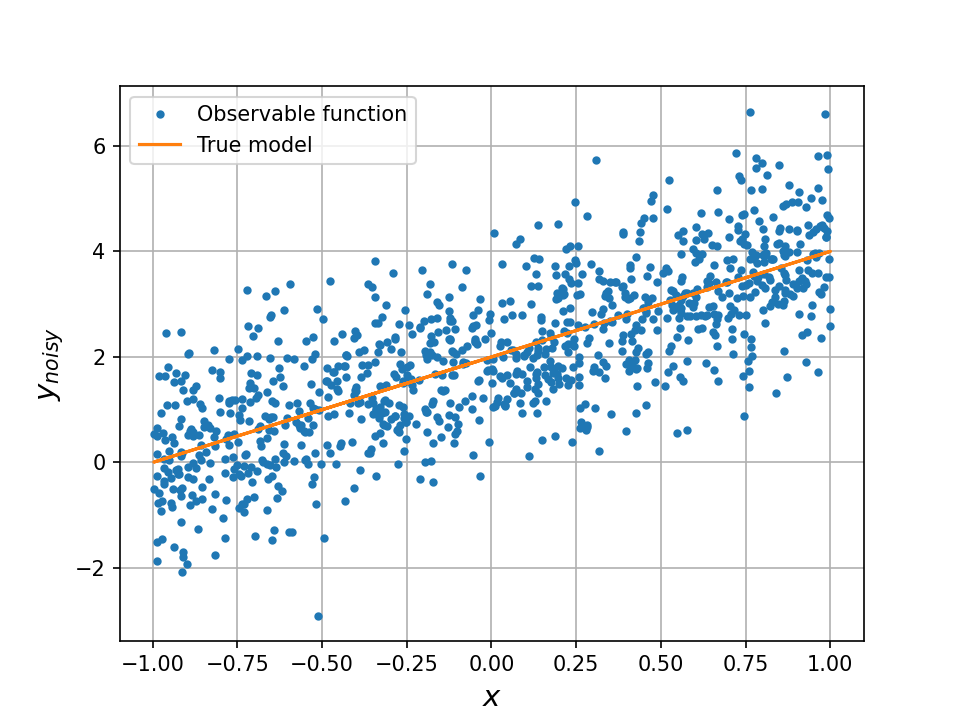

In [5]:
# Plot cost-function surface.
fig = plt.figure()
plt.plot(x, y_noisy, '.', label='Observable function')
plt.plot(x, y, label='True model')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y_{noisy}$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

### Calculando e plotando a superfície de erro e de contorno.

<IPython.core.display.Javascript object>


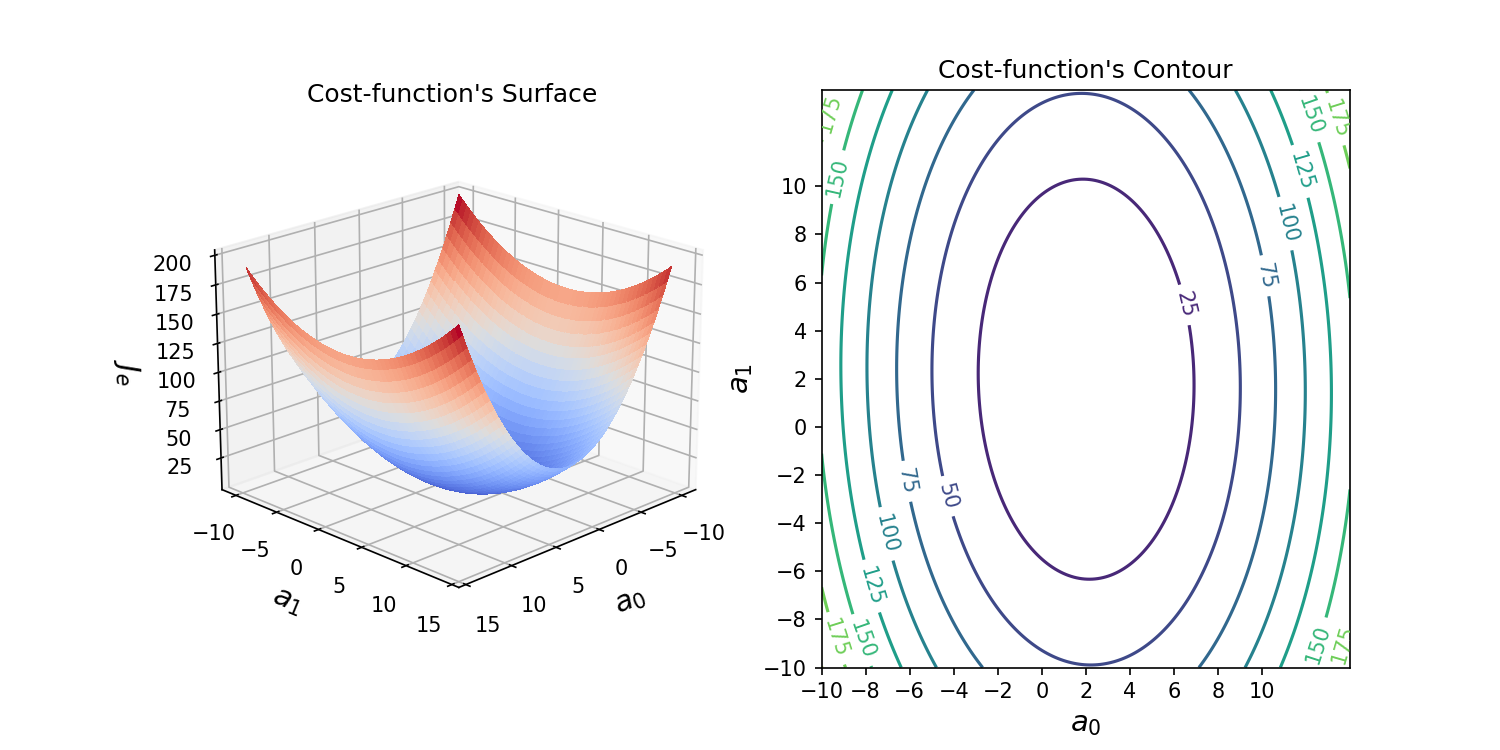

In [6]:
# Calculate data point for plotting error surface.
J, A0, A1 = calculateErrorSurface(x, y_noisy)

# Plot cost-function surface.
fig = plt.figure(figsize=(10, 5))

# Set up the axes for the first plot.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
ax.set_title('Cost-function\'s Surface')
ax.view_init(20, 45)

# Set up the axes for the second plot.
ax = fig.add_subplot(1, 2, 2)
cp = plt.contour(A0, A1, J)
ax.clabel(cp, inline=1, fontsize=10)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-10, 12, step=2.0))
ax.set_yticks(np.arange(-10, 12, step=2.0))

# Show the plot.
plt.show()

### Criando a matriz de atributos.

A função hipótese usada é dada por

$$\hat{y} = h(x) = \hat{a}_0 + \hat{a}_1x = \textbf{X} \hat{\textbf{a}} $$

In [7]:
# Attribute matrix.
# add x0 = 1 to each instance.
X = np.c_[np.ones((N, 1)), x]

### Encontrando a solução ótima com a equação normal.

In [8]:
# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X, y_noisy)

# Print best solution.
print('a0: %1.4f' % (a_opt[0, 0]))
print('a1: %1.4f' % (a_opt[1, 0]))
print('Erro ótimo:', Joptimum)

a0: 2.0151
a1: 1.9820
Erro ótimo: 0.994060499872569


### Encontrando a solução com o gradiente descendente.

In [9]:
# Batch gradient descent solution.
alpha = 0.1  # learning rate

# Number of iterations.
n_iterations = 1000

# Run batch gradient-descent algorithm.
a, a_hist, Jgd, iteration = batchGradientDescent(X, y_noisy, alpha, n_iterations)

# Print solution found with the gradient-descent algorithm.
print('a0: %1.4f' % (a[0, 0]))
print('a1: %1.4f' % (a[1, 0]))
print('Erro GD:', Jgd[iteration])

a0: 2.0152
a1: 1.9807
Erro GD: 0.9940611263447252


### Curva do erro em função das épocas de treinamento.

<IPython.core.display.Javascript object>


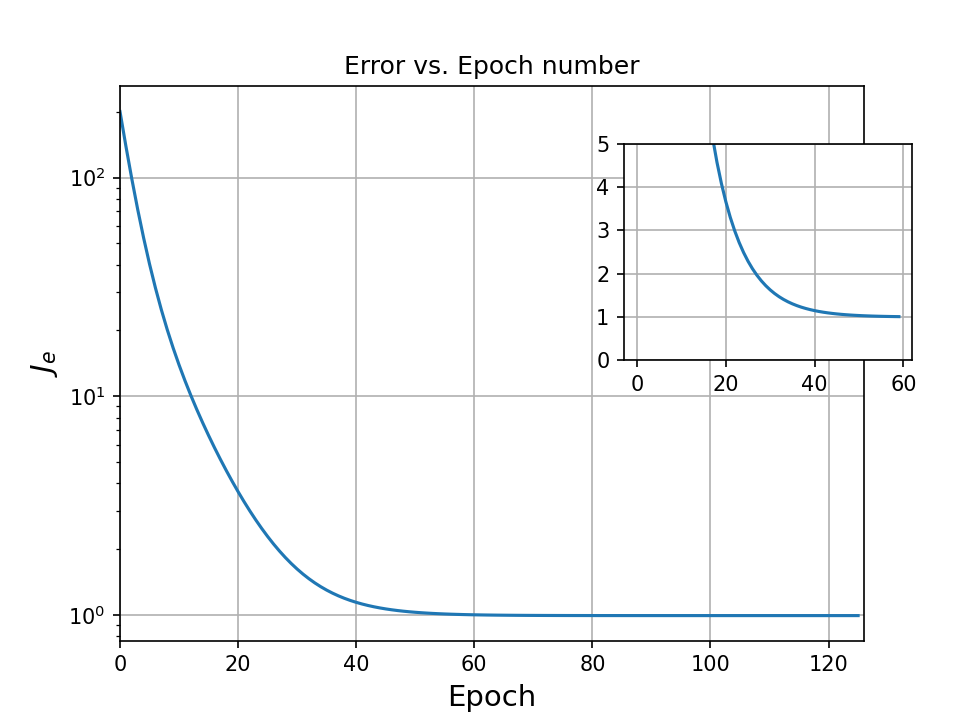

In [16]:
fig = plt.figure()

plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Epoch number')
plt.grid()

left, bottom, width, height = [0.65, 0.5, 0.3, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(np.arange(0, 60), Jgd[0:60])
ax3.grid()
ax3.set_ylim(0, 5)
plt.show()

**Observações**:

+ Essa versão do gradiente descendente é conhecida como gradiente descendente em batelada, pois todas os exemplos do conjunto de treinamento são usados para calcular o vetor gradiente.
+ O erro converge suavemente para o menor valor possível, sem variações (oscilações) de valor entre épocas.
    * **Época**: é quando terminamos de apresentar todos os exemplos ao algoritmo.
+ O tempo de convergência desta versão pode ser bem longo se o conjunto de treinamento for muito grande, dado que o modelo é apresentado a todos os exemplos a cada época.

### Plotando a superfície de contorno com o histórico de atualizações dos pesos.

Plotamos a superfície de contorno com o caminho feito pelo algoritmo até a convergência, ou seja, até o ponto de mínimo da superfície de erro (ponto onde o gradiente é próximo de zero ou a inclinação da reta tangente ao ponto é nula).

<IPython.core.display.Javascript object>


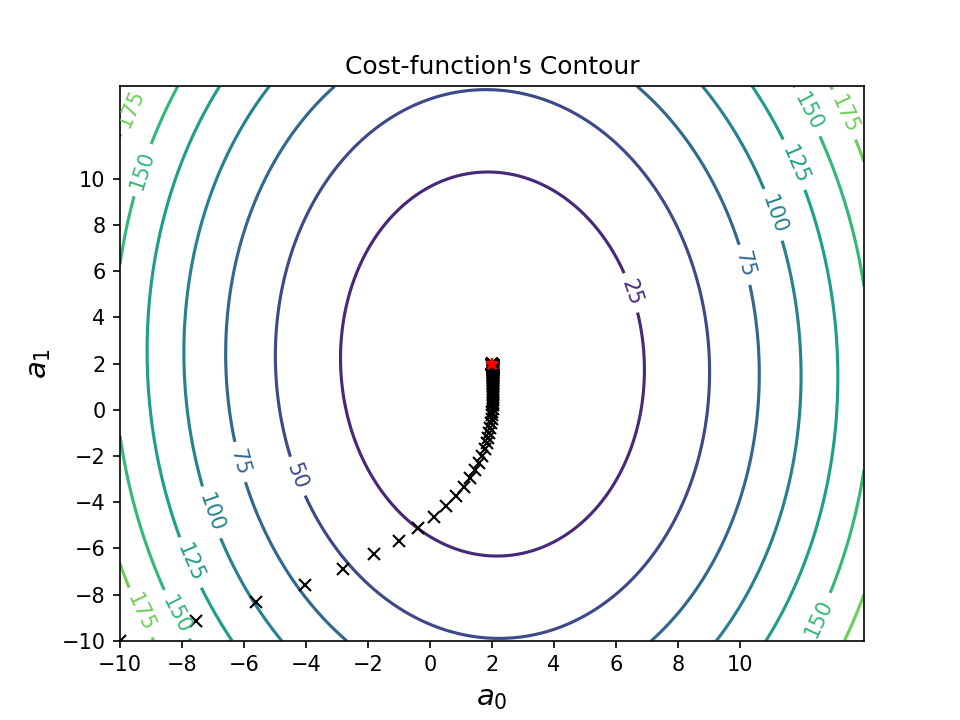

In [11]:
# Plot figure.        
fig = plt.figure()
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
# save figure into file.
#plt.savefig("error_contour_bgd.png", dpi=600)
plt.show()

**Observações**:

+ Os pesos seguem sempre o sentido do **máximo decrescimento** da superfície de erro.
+ A **caminho** feito pelas atualizações dos pesos é **regular**, sem variações bruscas de direção a cada época.
+ **Converge** e se **estabiliza** no **ponto de mínimo global**, ou seja, o vetor gradiente é praticamente nulo.
+ Ao final do treinamento, os valores dos **pesos** são muito **próximos dos valores ótimos**.

### Comparando os resultados.

In [12]:
print('Optimum result')
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('\nApproximated result')
print('a0_gd: ' + str(a[0, 0]))
print('a1_gd: ' + str(a[1, 0]))

Optimum result
a0_opt: 2.015143873884634
a1_opt: 1.9820125955147139

Approximated result
a0_gd: 2.0151800953802765
a1_gd: 1.9806698372423317


### Ajuste de Curva Animado.

<IPython.core.display.Javascript object>


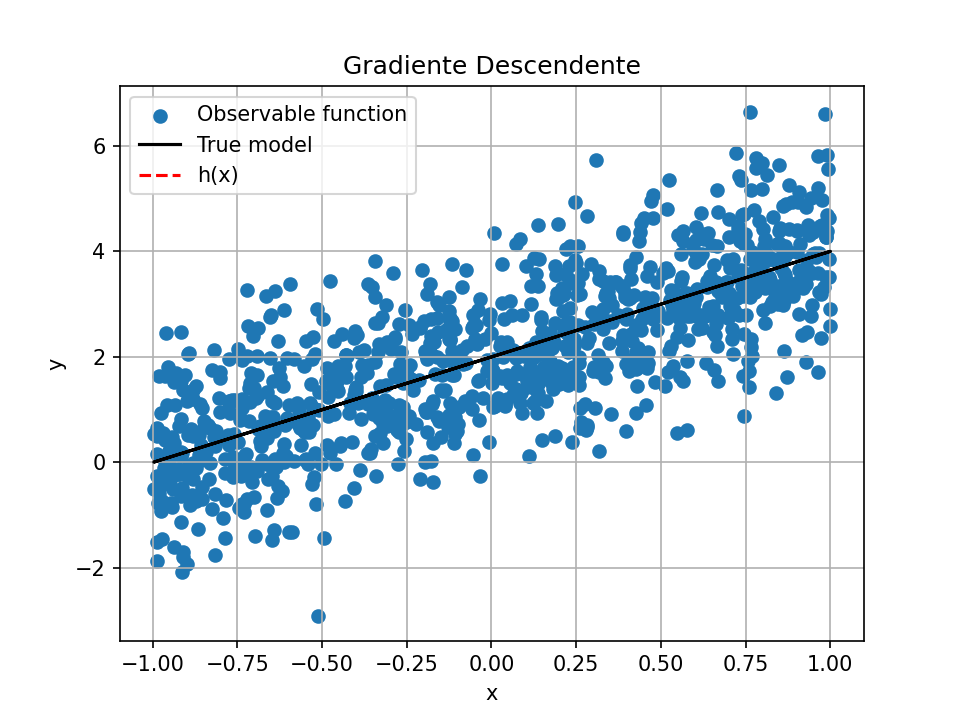

In [13]:
fig, ax = plt.subplots()
plt.scatter(x, y_noisy, label='Observable function')
plt.plot(x, y, 'k', label='True model')
xl = []
yl = []
ln, = plt.plot(xl, yl, 'r--', animated=True, label='h(x)')
plt.grid()
plt.title('Gradiente Descendente')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend()
    return ln,

def update(frame):
    theta = np.zeros((2,1))
    theta[0] = a_hist[0,frame]
    theta[1] = a_hist[1,frame]
    f = functools.partial(h, a=theta)
    y = f(X_b)
    ln.set_data(x, y)
    return ln,

# Create animated figure.
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=300)
# Display the animated figure.
display(HTML(ani.to_html5_video()))

# Save the animated figure.
#ani.save('animated_linear_regression.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

###  Histórico de ajuste dos pesos animado

<IPython.core.display.Javascript object>


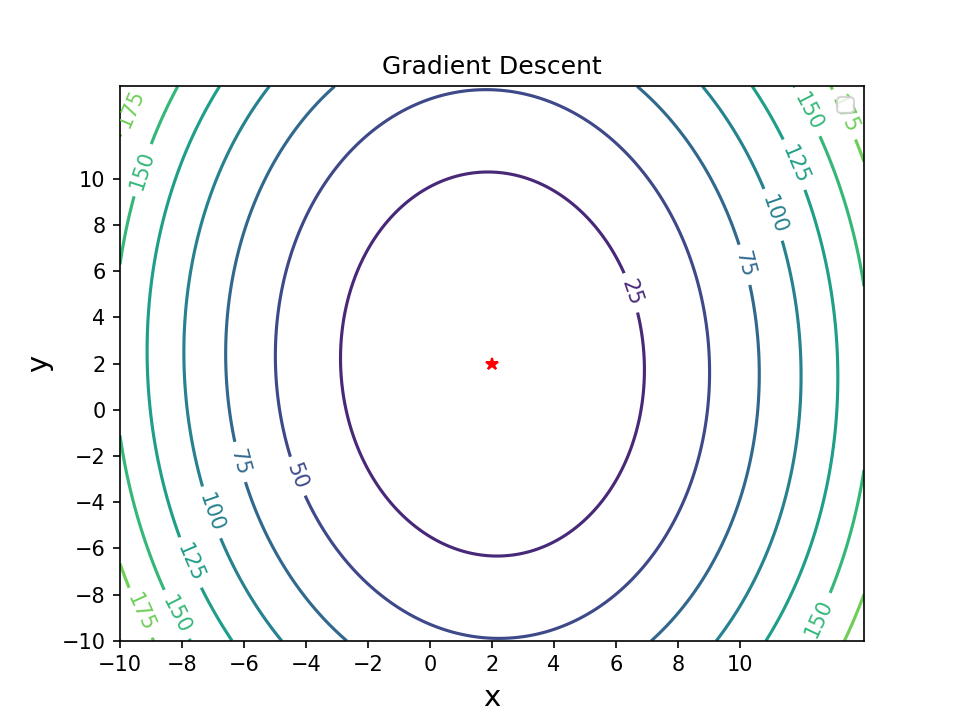

In [14]:
fig, ax = plt.subplots()
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
xl = []
yl = []
ln, = plt.plot(xl, yl, 'kx', animated=True)
plt.title('Gradient Descent')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))

def init():
    ax.set_xlabel('$a_0$', fontsize=14)
    ax.set_ylabel('$a_1$', fontsize=14)
    return ln,

def update(frame):
    ln.set_data(a_hist[0, frame], a_hist[1, frame])
    return ln,

ani2 = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=1000)
display(HTML(ani2.to_html5_video()))

#ani2.save('animated_linear_regression_contour.mp4', fps=30, extra_args=['-vcodec', 'libx264'])